In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 初识TensorFlow

In [46]:
w = tf.Variable(tf.constant(5,dtype = tf.float32))
lr = 0.5
epoch = 10
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [47]:
for epoch in range(epoch):
    with tf.GradientTape() as tape: #结构到了grads起了梯度的计算过程
        loss = tf.square(w+1)
    grads = tape.gradient(loss,w) #gradient函数告诉对谁求导
    w.assign_sub(lr * grads) #assign_sub 对变量做自己按
    print(f"After {epoch} epoch,w is {w.numpy()},loss is {loss}")
    

After 0 epoch,w is -1.0,loss is 36.0
After 1 epoch,w is -1.0,loss is 0.0
After 2 epoch,w is -1.0,loss is 0.0
After 3 epoch,w is -1.0,loss is 0.0
After 4 epoch,w is -1.0,loss is 0.0
After 5 epoch,w is -1.0,loss is 0.0
After 6 epoch,w is -1.0,loss is 0.0
After 7 epoch,w is -1.0,loss is 0.0
After 8 epoch,w is -1.0,loss is 0.0
After 9 epoch,w is -1.0,loss is 0.0


### 张量

In [5]:
b = tf.constant([2,4])  #默认数据为int32
b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4])>

In [3]:
a = tf.constant([1,5],dtype = tf.int64)  # tf.constant(张量内容,dtype = 数据类型) 
a,a.dtype,a.shape

(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 5], dtype=int64)>,
 tf.int64,
 TensorShape([2]))

#### numpy数据类型转化为张量

In [25]:
#tf.convert_to_tensor(数据名,dtype= 数据类型)
a = n p.arange(0,5)
b = tf.convert_to_tensor(a, dtype = tf.int64)
b

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4], dtype=int64)>

#### 简便赋值

In [26]:
#tf.zeros(维度) 全为0.0 默认数据类型为float
#tf.ones(维度) 全为1
#tf.fill(维度，指定值) 指定值

### 常用函数

In [27]:
#强制转换数据类型   tf.cast(张量名,dtype = 数据类型)

In [28]:
#计算张量维度上元素的最小值 tf.reduce_min(张量名)

In [29]:
#计算张量维度上元素的最大值 tf.reduce_max(张量名)

In [30]:
#计算张量沿着指定维度的均值 tf.reduce_mean(张量名,axis = 操作轴)
#操作轴 axis = 0 表示列 axis = 1 表示行

In [48]:
#计算张量沿着指定维度的和 tf.reduce_sum(张量名,axis = 操作轴)

In [51]:
#只有维度相同的张量四则运算 tf.add() tf.subtract() tf.multiply()  tf.divide()
#平方、次方、开方 tf.square() tf.pow() tf.sqrt()
#矩阵乘 tf.matmul()

In [6]:
a = tf.ones([3,2])
b = tf.fill([2,3],3.)
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]], dtype=float32)>

In [8]:
#s数据配对
features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
for element in dataset:
    print(element)

(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [21]:
import tensorflow as tf
x = tf.Variable(3.)
with tf.GradientTape() as tape:
    tape.watch(x)     # 在梯度带上设置计算睡的梯度
    y = tf.pow(x, 4)  # 表达式y = x^4
    dy_dx = tape.gradient(y, x)	# 计算一届梯度后, y_ = 4*x^3
    print(dy_dx)      # 带入x = 3.0后, 得出梯度y_ = 108
del tape


tf.Tensor(108.0, shape=(), dtype=float32)


#### 计算二阶梯度

In [22]:
x = tf.Variable(4.)
with tf.GradientTape() as tape1:
    tape1.watch(x)
    with tf.GradientTape() as tape2:
        tape2.watch(x)
        y = tf.pow(x, 4)
        dy_dx = tape2.gradient(y, x) # y' = 4x^3
        print(dy_dx)
    dy2_dx2 = tape1.gradient(dy_dx, x) # y'' = 12x^2
    print(dy2_dx2)
del tape1,tape2


tf.Tensor(256.0, shape=(), dtype=float32)
tf.Tensor(192.0, shape=(), dtype=float32)


#### 枚举

In [25]:
seq = ['one','two','three']
for i, element in enumerate(seq): 
    print(i,element)

0 one
1 two
2 three


#### 独热码 tf.one_hot

In [24]:
classes = 3
labels = tf.constant([1,0,2])  #输入元素最小值为0
output = tf.one_hot(labels, depth = classes) #one_hot(待转换数据，depth= 几分类)
output

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

#### sigmod函数 tf.nn.sigmod(x)

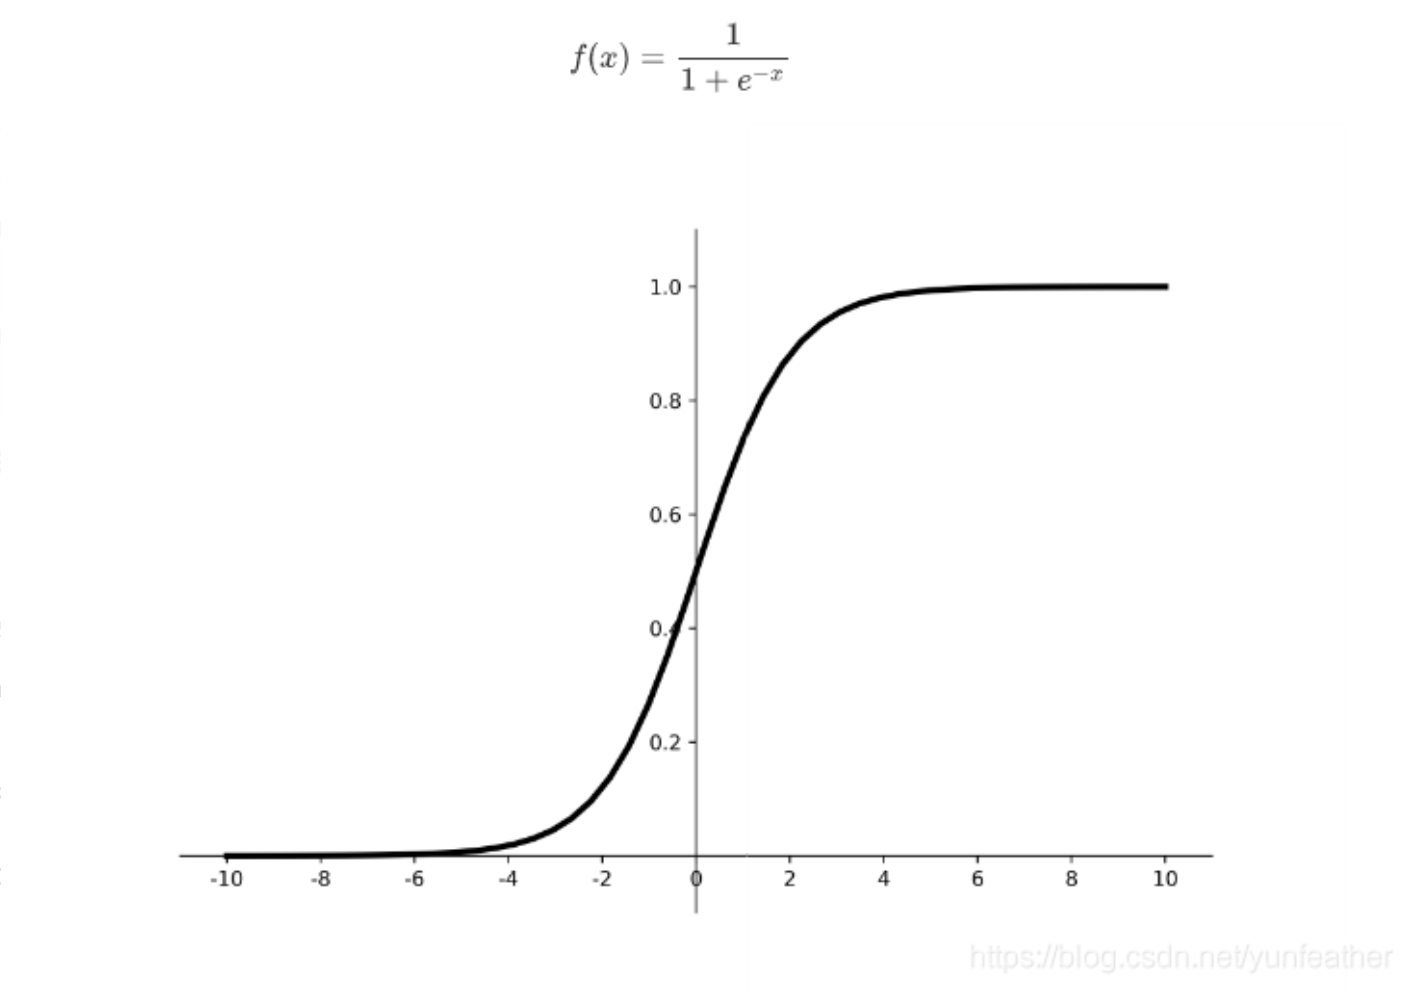

#### softmax函数 tf.nn.softmax()

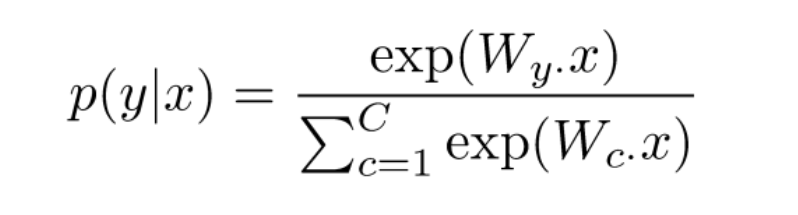

#### assign_sub() 自减函数 assign_add()自加函数

In [28]:
w = tf.Variable(4)
w.assign_sub(1)
w

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

#### tf.argmax(张量名，axis = 操作轴) 返回数据最大索引 0是列 1是行

In [30]:
test = np.array([[1,2,3],[2,3,4],[5,4,3],[8,7,2]])
print(tf.argmax(test,axis = 0))
print(tf.argmax(test,axis = 1))

tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)
